In [26]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from service.csv_parser import parse_package
import service.coordinate_service as service
import matplotlib.pyplot as plt

from service.options import county_path, town_path


countyData = parse_package(county_path)
townData = parse_package(town_path)


/home/lvbubi/PycharmProjects/Accomodation/backend/service/csv_parser.py:48: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataframe.name = column_names[['id', 'title']]


In [27]:
print(townData[2].name)
szja_0_300 = townData[2][['id', 'title', 'A', 'B', 'C', 'N', 'O']]
szja_0_300.name = townData[2].name
print(szja_0_300)

                                                     id title
3156  SZJA adófizető; 0-300 000 Ft éves összevont ad...     A
3157  SZJA adófizető; 1 000 001-1 200 000 Ft éves ös...     B
3158  SZJA adófizető; 1 200 001-1 500 000 Ft éves ös...     C
3159  SZJA adófizető; 1 500 001-1 800 000 Ft éves ös...     D
3160  SZJA adófizető; 1 800 001-2 000 000 Ft éves ös...     E
3161  SZJA adófizető; 10 000 001-20 000 000 Ft éves ...     F
3162  SZJA adófizető; 2 000 001-2 500 000 Ft éves ös...     G
3163  SZJA adófizető; 2 500 001-3 000 000 Ft éves ös...     H
3164  SZJA adófizető; 20 000 000-X Ft éves összevont...     I
3165  SZJA adófizető; 3 000 001-4 000 000 Ft éves ös...     J
3166  SZJA adófizető; 300 001-600 000 Ft éves összev...     K
3167  SZJA adófizető; 4 000 001-5 000 000 Ft éves ös...     L
3168  SZJA adófizető; 5 000 001-10 000 000 Ft éves ö...     M
3169  SZJA adófizető; 600 001-800 000 Ft éves összev...     N
3170  SZJA adófizető; 800 001-1 000 000 Ft éves össz...     O
        

<ipython-input-27-847a2ea1d06b>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  szja_0_300.name = townData[2].name


In [28]:
town_mn = szja_0_300
#town_mn = town_mn[town_mn['county'].str.contains('Borsod') == False]
#town_mn = town_mn[::10]
#town_mn.fillna(0, inplace=True)

In [29]:
town_mn = service.add_coordinates_to_town(town_mn)

#X = town_mn[['A', 'B', 'C', 'D']]
#X = X.div(town_mn, axis=0)
#X.fillna(0, inplace=True)



X = town_mn[['A', 'O']].values
y = town_mn['county'].values.reshape(-1,1)

/home/lvbubi/PycharmProjects/Accomodation/backend/service/coordinate_service.py:32: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.name = dataframe.name


In [30]:
# Tréning és teszt adatok létrehozása 2/3 és 1/3 vágással
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

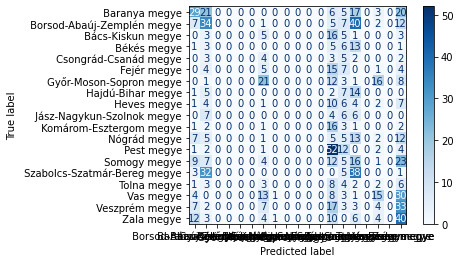

In [31]:
# 4. SGD
classifier_5 = MLPClassifier(
                    hidden_layer_sizes=100,
                    activation='tanh',
                    solver='sgd',
                    max_iter=1000,
                    alpha=0.005,
                    learning_rate='adaptive',
                    random_state=0)

classifier_5.fit(X_train, y_train.ravel())
y_pred_clf_5 = classifier_5.predict(X_test)

plot_confusion_matrix(classifier_5, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [32]:
print('roc auc score: '+str(roc_auc_score(y_true=y_test, y_score=y_pred_clf_5)))
print('f1 score: '+ str(f1_score(y_true=y_test, y_pred=y_pred_clf_5)))
print('Accuracy score: '+ str(classifier_5.score(X_test,y_test)))
print(classification_report(y_true=y_test, y_pred=y_pred_clf_5))

#results.append({'name': 'SGD+TANH(6)', 'accuracy_score': classifier_5.score(X_test,y_test) ,'f1-score': f1_score(y_true=y_test, y_pred=y_pred_clf_5), 'roc_auc_score': roc_auc_score(y_true=y_test, y_score=y_pred_clf_5), 'solver': 'sgd', 'activation': 'tanh'})

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


ValueError: multi_class must be in ('ovo', 'ovr')